In [1]:
# import standard python libraries
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
!wget https://vizhub.wustl.edu/privateHubs/ec9e0008c9dbfb860aa6/YueLab/brain.h3k27ac.merge.nodup.tagAlign_x_brain.input.merge.nodup.modify.tagAlign.fc.signal.bw \
-O /exports/igmm/eddie/wendy-lab/elias/Friman2022/heatmaps/brain.h3k27ac.merge.nodup.tagAlign_x_brain.input.merge.nodup.modify.tagAlign.fc.signal.bw -q
!wget https://vizhub.wustl.edu/privateHubs/ec9e0008c9dbfb860aa6/YueLab/muscle.h3k27ac.merge.nodup.tagAlign_x_muscle.input.merge.nodup.modify.tagAlign.fc.signal.bw \
-O /exports/igmm/eddie/wendy-lab/elias/Friman2022/heatmaps/muscle.h3k27ac.merge.nodup.tagAlign_x_muscle.input.merge.nodup.modify.tagAlign.fc.signal.bw
!wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4662nnn/GSM4662071/suppl/GSM4662071_YueLab-WGBS-brain.CG.bw \
-O /exports/igmm/eddie/wendy-lab/elias/Friman2022/heatmaps/GSM4662071_YueLab-WGBS-brain.CG.bw
!wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4662nnn/GSM4662077/suppl/GSM4662077_YueLab-WGBS-muscle.CG.bw \
-O /exports/igmm/eddie/wendy-lab/elias/Friman2022/heatmaps/GSM4662077_YueLab-WGBS-muscle.CG.bw

--2022-10-31 13:24:41--  https://vizhub.wustl.edu/privateHubs/ec9e0008c9dbfb860aa6/YueLab/muscle.h3k27ac.merge.nodup.tagAlign_x_muscle.input.merge.nodup.modify.tagAlign.fc.signal.bw
Resolving vizhub.wustl.edu (vizhub.wustl.edu)... 128.252.187.93
Connecting to vizhub.wustl.edu (vizhub.wustl.edu)|128.252.187.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 424767007 (405M)
Saving to: '/exports/igmm/eddie/wendy-lab/elias/Friman2022/heatmaps/muscle.h3k27ac.merge.nodup.tagAlign_x_muscle.input.merge.nodup.modify.tagAlign.fc.signal.bw'

100%[======================================>] 424,767,007 1.20MB/s   in 5m 40s 

2022-10-31 13:30:21 (1.19 MB/s) - '/exports/igmm/eddie/wendy-lab/elias/Friman2022/heatmaps/muscle.h3k27ac.merge.nodup.tagAlign_x_muscle.input.merge.nodup.modify.tagAlign.fc.signal.bw' saved [424767007/424767007]

--2022-10-31 13:30:21--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4662nnn/GSM4662071/suppl/GSM4662071_YueLab-WGBS-brain.CG.bw
Resolving ftp

Yang2020_fig2d.txt containts table from https://static-content.springer.com/esm/art%3A10.1038%2Fs41586-020-2962-9/MediaObjects/41586_2020_2962_MOESM6_ESM.xlsx sheet "Fig.2d"

In [3]:
df = pd.read_table("Yang2020_fig2d.txt", sep="\t")
df = df.replace("\,", ".", regex=True)

In [4]:
df

,chr,start,end,brain,e-brain,testis,spleen,blood,liver,colon,intestine,heart,muscle,skin,kidney
0,chr16,11597957,11599957,1.74,0.38,0.64,-0.96,0.76,-0.16,-0.79,-0.43,-0.10,-1.14,0.41,-0.56
1,chr11,39537741,39539741,1.50,0.95,2.09,0.11,-0.10,-0.21,0.04,1.34,-1.09,0.36,-1.05,-0.45
2,chr8,49429193,49431193,3.04,-0.61,-0.11,-0.62,0.72,-0.25,-0.62,-0.46,-1.27,-1.03,-0.21,-0.33
3,chr19,45921994,45923994,3.11,1.16,1.19,-0.61,-0.39,-0.21,-1.64,-1.39,-0.45,-0.58,1.22,-0.59
4,chr3,18875867,18877867,1.17,0.11,-0.88,-0.34,-0.13,-1.23,-0.33,-0.25,-0.45,-0.36,1.18,-0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58221,chr13,7681595,7683595,-0.45,-0.20,-0.18,-0.74,0.40,-0.49,-0.62,-0.10,-1.15,1.15,0.18,0.27
58222,chr13,7700371,7702371,-0.12,-0.18,-0.07,-0.34,-1.63,0.27,0.15,-0.84,-0.63,0.98,0.69,-0.43
58223,chr13,7740931,7742931,-0.57,0.20,1.04,-0.97,-0.17,0.13,-0.88,-0.41,-0.20,0.56,-0.40,-0.73
58224,chr8,16486523,16488523,-0.20,0.34,-0.10,1.25,0.63,-0.27,-0.54,-0.56,-0.37,0.00,1.14,0.56


In [5]:
df.loc[:, ~df.columns.isin(["chr", "start", "end"])] = df.loc[:, ~df.columns.isin(["chr", "start", "end"])].astype(float)

/tmp/ipykernel_198579/853954830.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, ~df.columns.isin(["chr", "start", "end"])] = df.loc[:, ~df.columns.isin(["chr", "start", "end"])].astype(float)


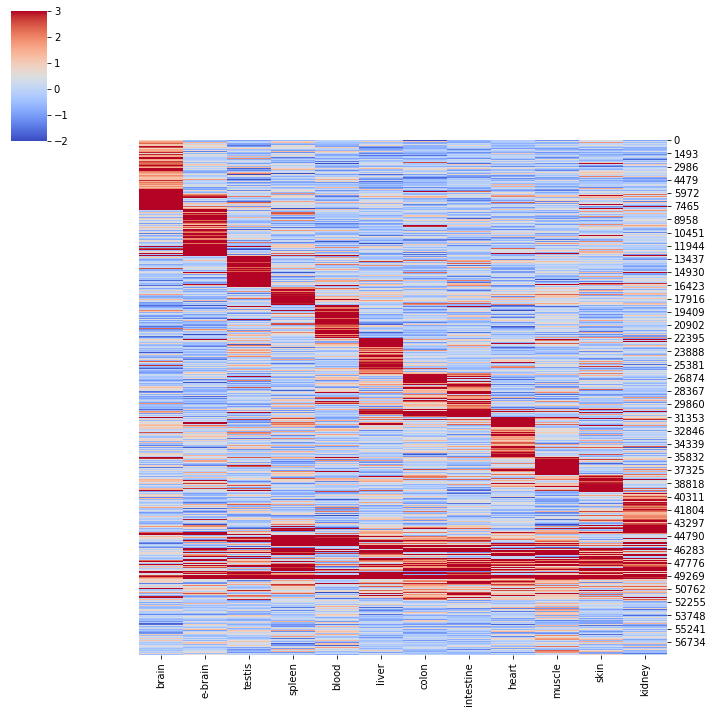

In [6]:
sns.clustermap(data=df.drop(columns=["chr", "start", "end"]), 
               row_cluster=False, col_cluster=False, cmap="coolwarm", vmin = -2, vmax=3)

In [7]:
df["brain_enriched"] = np.where((df["brain"]>4) & (df["muscle"]<1), True, False) 

In [8]:
df["muscle_enriched"] = np.where((df["muscle"]>4) & (df["brain"]<1), True, False) 

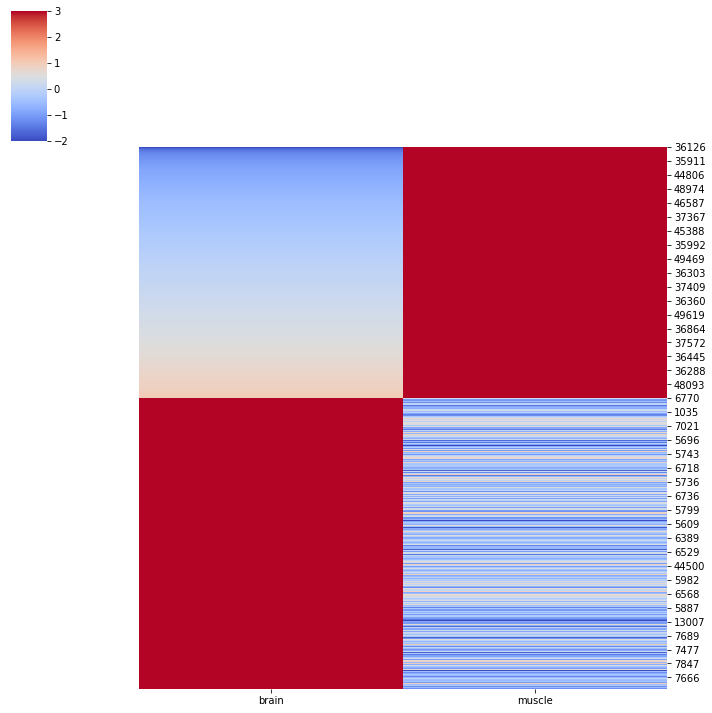

In [9]:
sns.clustermap(data=df.loc[(df["muscle_enriched"]) | (df["brain_enriched"]), ["brain", "muscle"]].sort_values("brain"), 
               row_cluster=False, col_cluster=False, cmap="coolwarm", vmin = -2, vmax=3)

In [10]:
df.loc[df["muscle_enriched"], 
       ["chr", "start", "end"]].to_csv("GSE134055_Yang_H3K27ac_muscle_enriched.bed", sep="\t", index=False, header=None)

In [11]:
df.loc[df["brain_enriched"], 
       ["chr", "start", "end"]].to_csv("GSE134055_Yang_H3K27ac_brain_enriched.bed", sep="\t", index=False, header=None)